In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
train_df = pd.read_excel('cancer_train.xlsx', sheet_name = 0)
test_df = pd.read_excel('cancer_test.xlsx', sheet_name = 0)

In [3]:
train_df.head()

,Id,Cancer Site,Year,Sex,Age,Incidence and Survival Assumptions,Annual Cost Increase (applied to initial and last phases),Initial Year After Diagnosis Cost,Continuing Phase Cost,Last Year of Life Cost,Total Costs
0,1182,Head_Neck,2020,Both sexes,All ages,"Incidence, Survival at constant rate",0.00,1281.0,1211.1,1848.5,4340.6
1,199,Pancreas,2011,Both sexes,All ages,"Incidence follows recent trend, Survival constant",0.00,1454.8,104.8,748.2,2307.8
2,873,Melanoma,2017,Both sexes,All ages,"Incidence, Survival follow recent trends",0.00,730.3,2170.5,441.3,3342.1
3,1216,Melanoma,2020,Both sexes,All ages,"Incidence, Survival follow recent trends",0.02,989.9,2474.5,592.0,4056.5
4,783,Stomach,2016,Both sexes,All ages,"Incidence, Survival follow recent trends",0.00,753.3,259.1,811.7,1824.1


**Data Information, Description, checking skewness:**

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1003 entries, 0 to 1002
Data columns (total 11 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   Id                                                         1003 non-null   int64  
 1   Cancer Site                                                1003 non-null   object 
 2   Year                                                       1003 non-null   int64  
 3   Sex                                                        1003 non-null   object 
 4   Age                                                        1003 non-null   object 
 5   Incidence and Survival Assumptions                         1003 non-null   object 
 6   Annual Cost Increase (applied to initial and last phases)  1003 non-null   float64
 7   Initial Year After Diagnosis Cost                          1003 non-null   float64
 8   Continui

In [5]:
train_df.describe()

,Id,Year,Annual Cost Increase (applied to initial and last phases),Initial Year After Diagnosis Cost,Continuing Phase Cost,Last Year of Life Cost,Total Costs
count,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000
mean,633.898305,2015.064806,0.011605,4916.491027,6036.715653,5020.766899,15973.973579
std,362.429386,3.162718,0.018682,10141.519437,12619.060376,10420.271183,32939.409672
min,0.000000,2010.000000,0.000000,301.200000,98.900000,330.600000,1225.100000
25%,319.500000,2012.000000,0.000000,948.400000,857.350000,916.900000,2879.750000
50%,647.000000,2015.000000,0.000000,1394.300000,1944.800000,1748.800000,5137.000000
75%,941.500000,2018.000000,0.020000,4947.250000,5383.300000,4538.050000,14240.900000
max,1252.000000,2020.000000,0.050000,68858.000000,63958.700000,74159.700000,206587.100000


In [6]:
train_df.skew()

Id                                                          -0.053761
Year                                                        -0.048548
Annual Cost Increase (applied to initial and last phases)    1.311702
Initial Year After Diagnosis Cost                            3.705070
Continuing Phase Cost                                        3.447415
Last Year of Life Cost                                       3.805618
Total Costs                                                  3.663429
dtype: float64

In [7]:
train_df.drop_duplicates(inplace = True)

In [8]:
train_df['Annual Cost Increase (applied to initial and last phases)'].min()

0.0

In [9]:
train_df['Annual Cost Increase (applied to initial and last phases)'].max()

0.05

In [10]:
train_df['Initial Year After Diagnosis Cost'].min()

301.2

In [11]:
train_df['Initial Year After Diagnosis Cost'].max()

68858.0

In [12]:
train_df['Continuing Phase Cost'].min()

98.9

In [13]:
train_df['Continuing Phase Cost'].max()

63958.7

In [14]:
train_df['Last Year of Life Cost'].min()

330.6

In [15]:
train_df['Last Year of Life Cost'].max()

74159.7

In [16]:
train_df['Total Costs'].min()

1225.1

In [17]:
train_df['Total Costs'].max()

206587.1

In [18]:
train_df.nunique()

Id                                                           1003
Cancer Site                                                    19
Year                                                           11
Sex                                                             3
Age                                                             1
Incidence and Survival Assumptions                              4
Annual Cost Increase (applied to initial and last phases)       3
Initial Year After Diagnosis Cost                             692
Continuing Phase Cost                                         713
Last Year of Life Cost                                        964
Total Costs                                                   972
dtype: int64

# EDA:

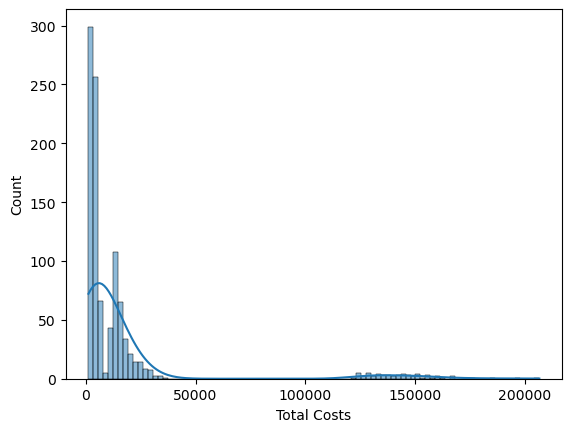

In [19]:
sns.histplot(data = train_df, x = 'Total Costs', kde = True)
plt.show()

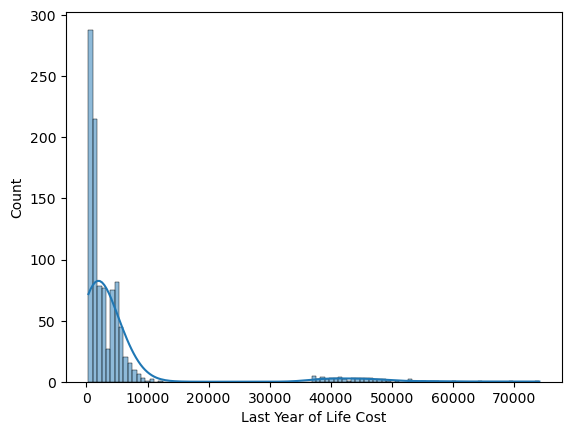

In [20]:
sns.histplot(data = train_df, x = 'Last Year of Life Cost', kde = True)
plt.show()

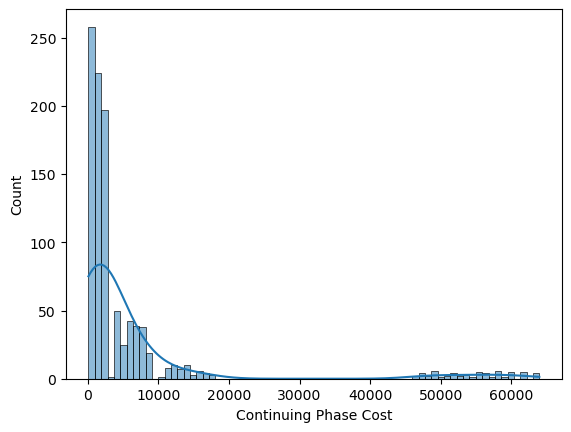

In [21]:
sns.histplot(data = train_df, x = 'Continuing Phase Cost', kde = True)
plt.show()

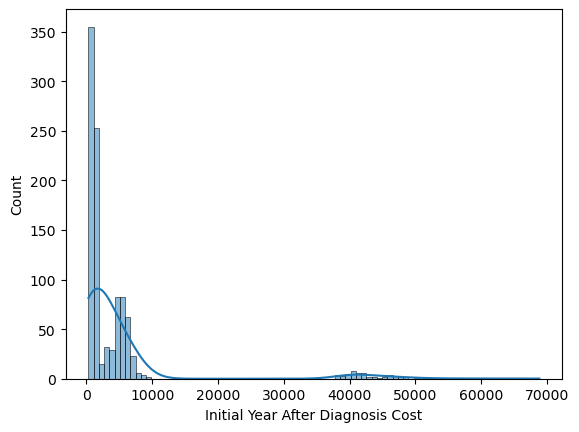

In [22]:
sns.histplot(data = train_df, x = 'Initial Year After Diagnosis Cost', kde = True)
plt.show()

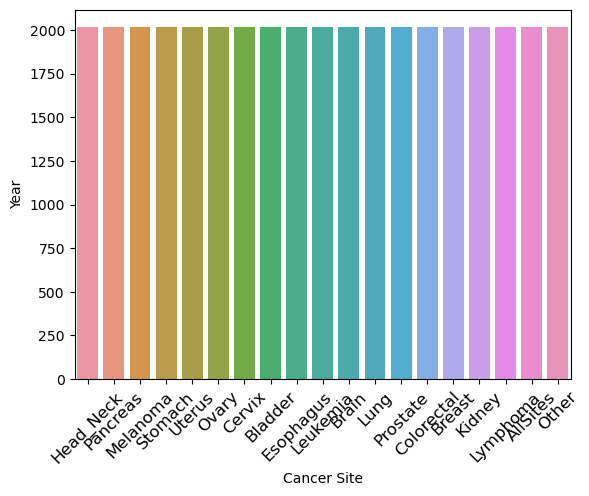

In [23]:
sns.barplot(x = 'Cancer Site', y = 'Year', data = train_df, ci = None)
plt.xticks(rotation = 45, size=12)
plt.show()

# Multivariate Analysis:

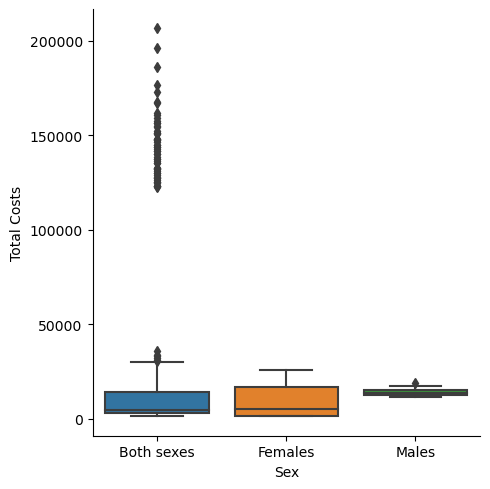

In [24]:
sns.catplot(data = train_df, x="Sex", y="Total Costs", kind="box")

<AxesSubplot:xlabel='Age', ylabel='Total Costs'>

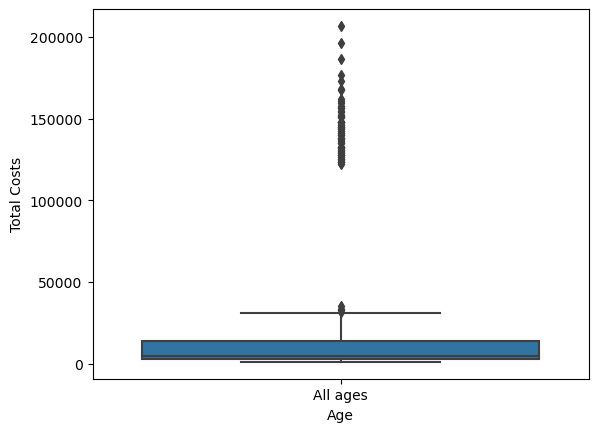

In [25]:
sns.boxplot(data = train_df, x = 'Age', y = "Total Costs")

<AxesSubplot:xlabel='Sex', ylabel='Last Year of Life Cost'>

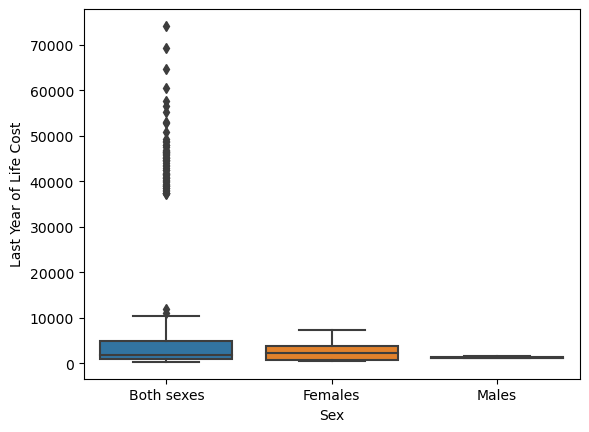

In [26]:
sns.boxplot(data = train_df, x = 'Sex', y = "Last Year of Life Cost")

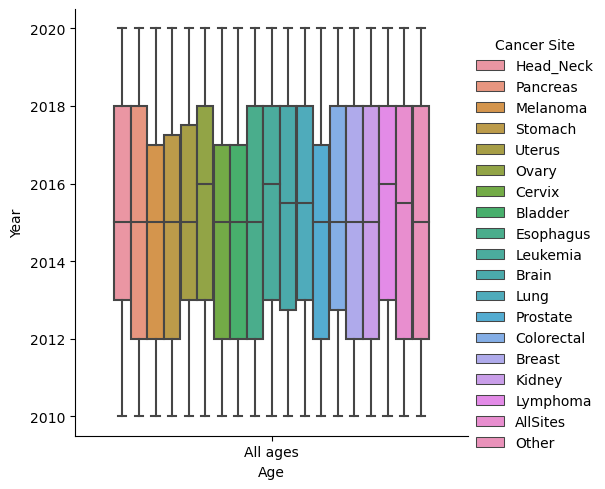

In [27]:
sns.catplot(data=train_df, x="Age", y="Year", hue="Cancer Site", kind="box")

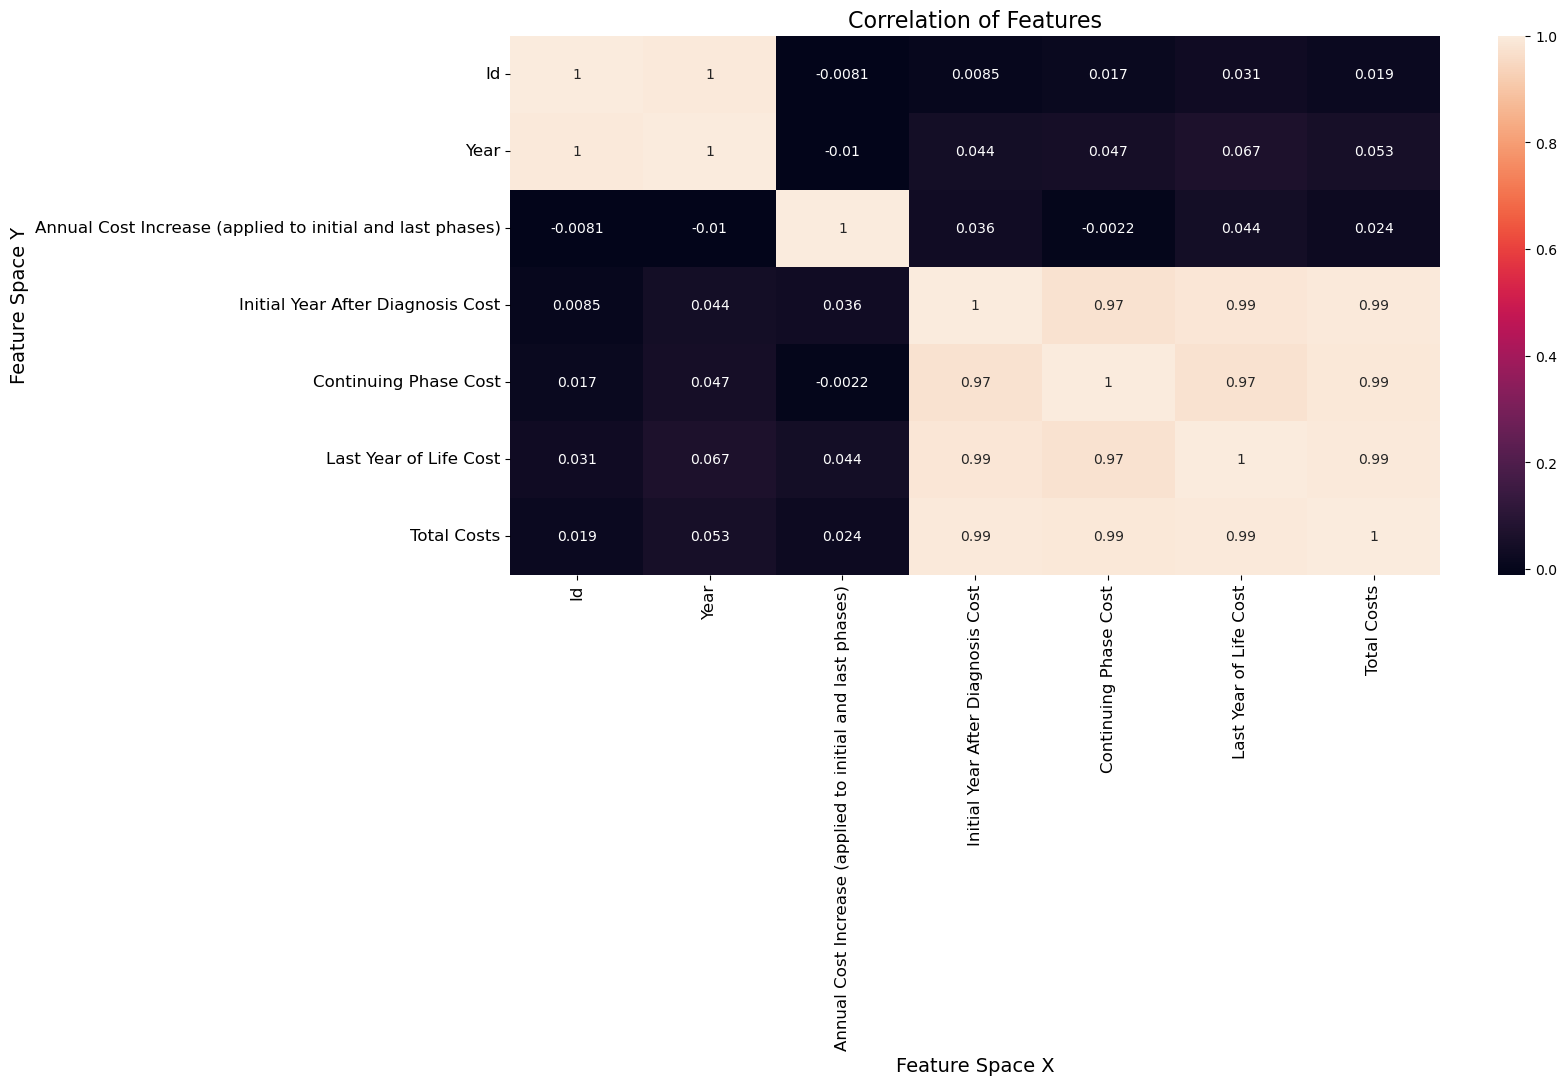

In [28]:
figure = plt.figure(figsize=[15, 7])
sns.heatmap(data=train_df.corr(), annot=True)
plt.xticks(size=12, rotation=90)
plt.yticks(size=12)
plt.xlabel(xlabel='Feature Space X', size=14)
plt.ylabel(ylabel='Feature Space Y', size=14)
plt.title(label='Correlation of Features', size=16)
plt.show()

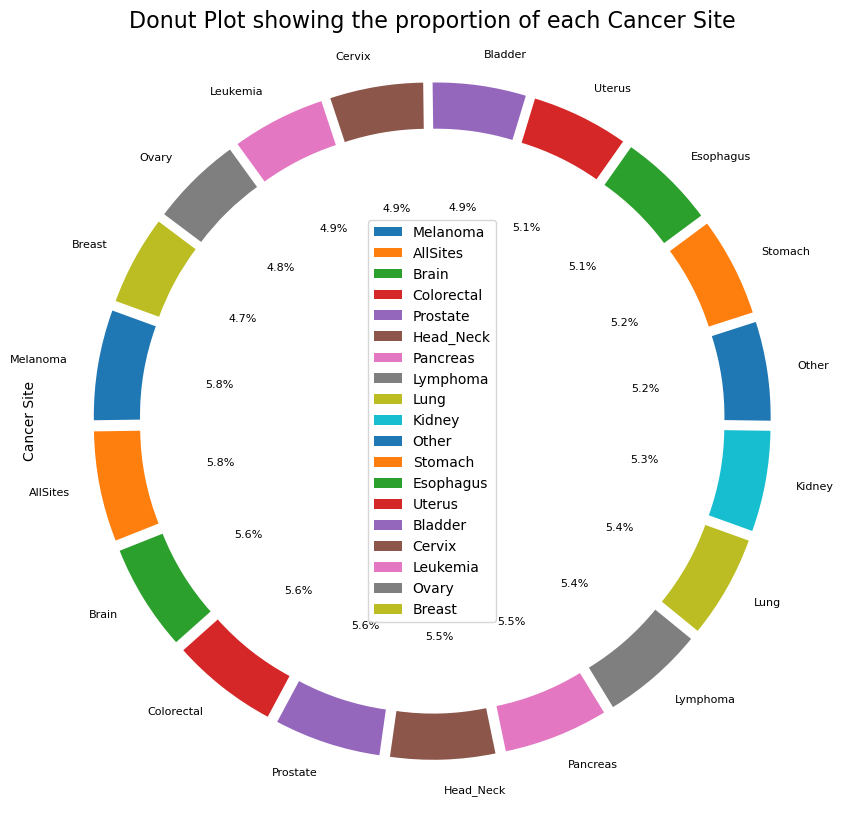

In [29]:
# Exploding space based on the number of categories
space = np.ones(19)/10
figure = plt.figure(figsize=[10, 10])
# Using magic of pandas pie() function
train_df['Cancer Site'].value_counts().plot.pie(explode=space, fontsize=8, 
                                       autopct='%3.1f%%', wedgeprops=dict(width=0.15), 
                                        startangle=160, legend = True)

plt.title(label='Donut Plot showing the proportion of each Cancer Site', size=16)
plt.show()

<AxesSubplot:xlabel='Year', ylabel='Total Costs'>

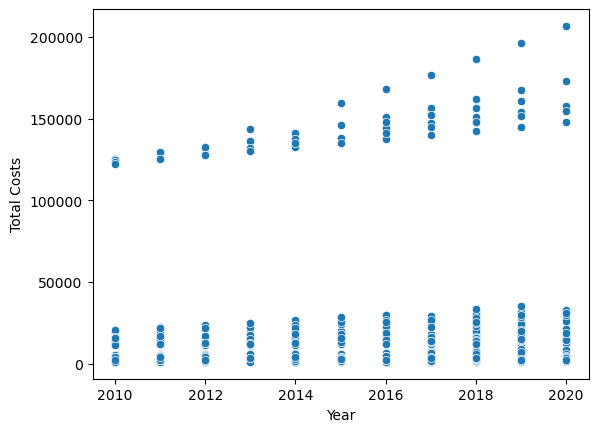

In [30]:
sns.scatterplot(data = train_df, x = 'Year', y = 'Total Costs')

<AxesSubplot:xlabel='Year', ylabel='Total Costs'>

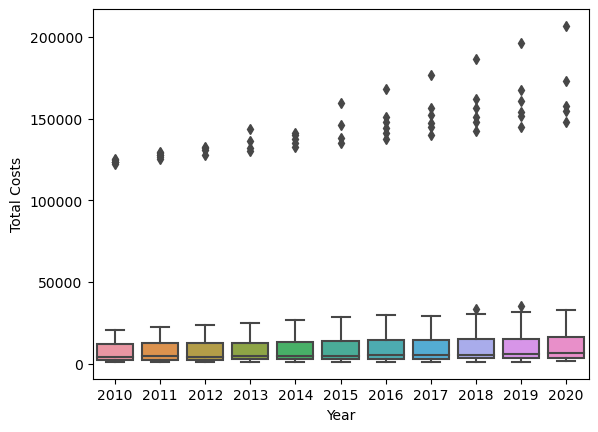

In [31]:
sns.boxplot(data = train_df, x = 'Year', y = 'Total Costs')

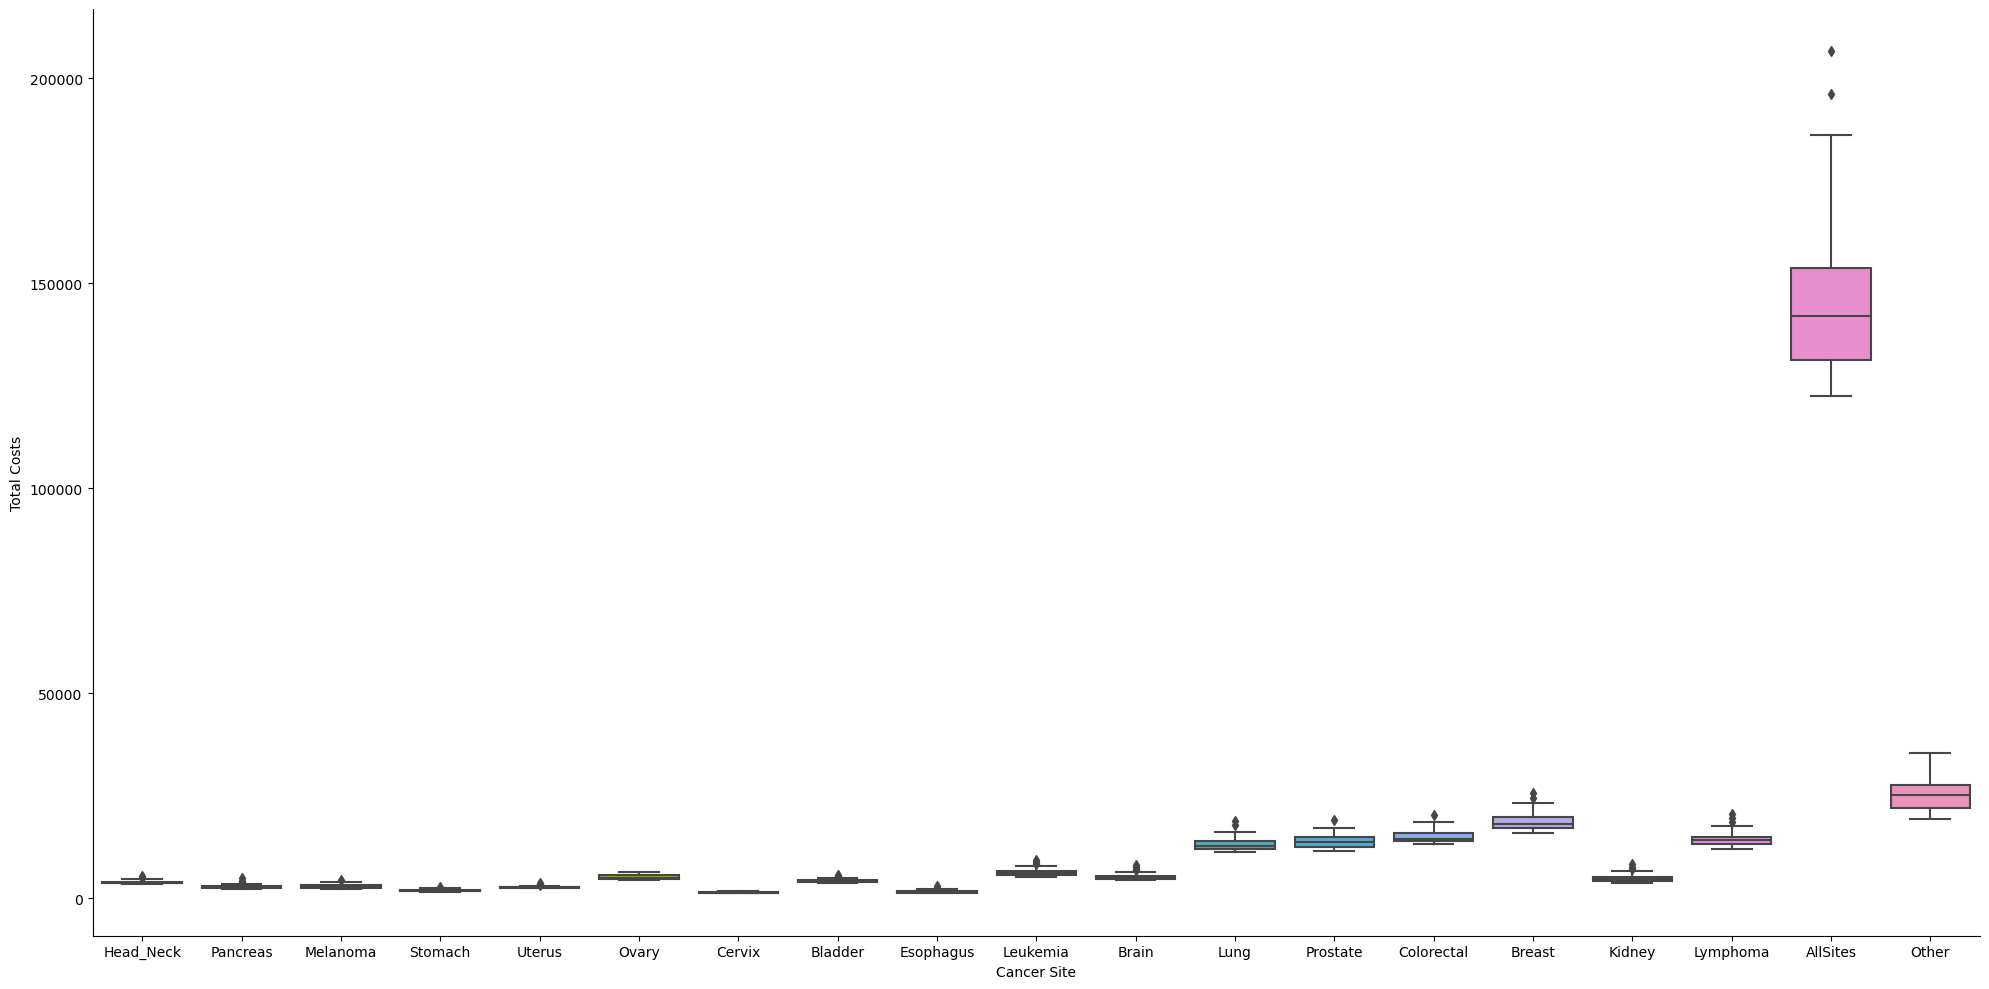

In [32]:
sns.catplot(data = train_df, x = 'Cancer Site', y = 'Total Costs',legend_out=False, height=10, aspect=2, kind = "box")

In [33]:
train_df['L_Total Costs'] = np.log(train_df['Total Costs'])   #log transformation to remove skewness

In [34]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1003 entries, 0 to 1002
Data columns (total 12 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   Id                                                         1003 non-null   int64  
 1   Cancer Site                                                1003 non-null   object 
 2   Year                                                       1003 non-null   int64  
 3   Sex                                                        1003 non-null   object 
 4   Age                                                        1003 non-null   object 
 5   Incidence and Survival Assumptions                         1003 non-null   object 
 6   Annual Cost Increase (applied to initial and last phases)  1003 non-null   float64
 7   Initial Year After Diagnosis Cost                          1003 non-null   float64
 8   Continui

In [35]:
df_train = train_df

In [36]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1003 entries, 0 to 1002
Data columns (total 12 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   Id                                                         1003 non-null   int64  
 1   Cancer Site                                                1003 non-null   object 
 2   Year                                                       1003 non-null   int64  
 3   Sex                                                        1003 non-null   object 
 4   Age                                                        1003 non-null   object 
 5   Incidence and Survival Assumptions                         1003 non-null   object 
 6   Annual Cost Increase (applied to initial and last phases)  1003 non-null   float64
 7   Initial Year After Diagnosis Cost                          1003 non-null   float64
 8   Continui

In [37]:
df_train.drop('Continuing Phase Cost', axis = 1, inplace = True)
df_train.drop('Annual Cost Increase (applied to initial and last phases)', axis = 1, inplace = True)
df_train.drop('Last Year of Life Cost', axis = 1, inplace = True)
df_train.drop('Total Costs', axis = 1, inplace = True)
df_train.drop('Initial Year After Diagnosis Cost', axis = 1, inplace = True)
df_train.drop('Year', axis = 1, inplace = True)

In [38]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1003 entries, 0 to 1002
Data columns (total 6 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Id                                  1003 non-null   int64  
 1   Cancer Site                         1003 non-null   object 
 2   Sex                                 1003 non-null   object 
 3   Age                                 1003 non-null   object 
 4   Incidence and Survival Assumptions  1003 non-null   object 
 5   L_Total Costs                       1003 non-null   float64
dtypes: float64(1), int64(1), object(4)
memory usage: 54.9+ KB


<AxesSubplot:xlabel='L_Total Costs', ylabel='Count'>

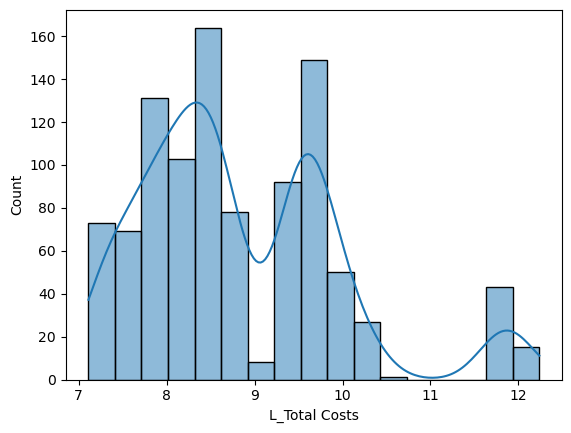

In [39]:
sns.histplot(data = df_train, x = 'L_Total Costs', kde = True)

In [40]:
df_train['Cancer Site'].unique()

array(['Head_Neck', 'Pancreas', 'Melanoma', 'Stomach', 'Uterus', 'Ovary',
       'Cervix', 'Bladder', 'Esophagus', 'Leukemia', 'Brain', 'Lung',
       'Prostate', 'Colorectal', 'Breast', 'Kidney', 'Lymphoma',
       'AllSites', 'Other'], dtype=object)

In [41]:
df_train['Sex'].unique()

array(['Both sexes', 'Females', 'Males'], dtype=object)

In [42]:
df_train['Age'].unique()

array(['All ages'], dtype=object)

In [43]:
df_train['Incidence and Survival Assumptions'].unique()

array(['Incidence, Survival at constant rate',
       'Incidence follows recent trend, Survival constant',
       'Incidence, Survival follow recent trends',
       'Survival follows recent trend, Incidence constant'], dtype=object)

In [44]:
df_train['Sex'] = df_train['Sex'].map({'Both sexes': 0, 'Females': 1, 'Males': 2})

In [45]:
df_train.drop('Age', axis = 1, inplace = True)

In [46]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [47]:
Encoder = LabelEncoder()

In [48]:
df_train['Cancer Site'] = Encoder.fit_transform(df_train['Cancer Site'])
df_train['Incidence and Survival Assumptions'] = Encoder.fit_transform(df_train['Incidence and Survival Assumptions'])

In [49]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1003 entries, 0 to 1002
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Id                                  1003 non-null   int64  
 1   Cancer Site                         1003 non-null   int32  
 2   Sex                                 1003 non-null   int64  
 3   Incidence and Survival Assumptions  1003 non-null   int32  
 4   L_Total Costs                       1003 non-null   float64
dtypes: float64(1), int32(2), int64(2)
memory usage: 39.2 KB


# Train-Test Split:

In [50]:
x = df_train.iloc[:, 1:4]
y = df_train['L_Total Costs']

In [51]:
x

,Cancer Site,Sex,Incidence and Survival Assumptions
0,7,0,1
1,15,0,0
2,12,0,2
3,12,0,2
4,17,0,2
...,...,...,...
998,3,1,1
999,11,0,2
1000,18,0,3
1001,10,0,3


In [52]:
y

0       8.375768
1       7.744050
2       8.114355
3       8.308076
4       7.508842
          ...   
998     9.908520
999     9.621635
1000    8.003597
1001    9.564849
1002    7.690149
Name: L_Total Costs, Length: 1003, dtype: float64

# Train-Test Split:

In [53]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 42)


# 1. RandomForest Regressor:

In [54]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()

In [55]:
rfr.fit(x_train, y_train)

RandomForestRegressor()

In [63]:
y_pred_train = rfr.predict(x_train)
y_pred_test = rfr.predict(x_test)

In [64]:
y_pred_test

array([ 9.80750028,  8.63807518,  8.54829065,  9.60306242,  7.69613387,
        9.80750028,  8.4142305 ,  9.47999266, 10.10816971,  8.39318687,
        8.6426341 ,  8.4442608 ,  8.77269363, 10.14381309,  8.38859487,
        7.96289186,  7.24811716,  8.77269363,  9.98457269, 10.14381309,
        7.50368104,  8.55416769,  7.96289186,  8.6426341 ,  9.53564065,
       11.81977005,  9.51483287,  8.03226355,  9.57042294,  8.4142305 ,
        8.6426341 ,  8.5836119 ,  7.24811716, 10.14381309,  8.27005764,
        7.94874484,  9.49158833,  7.96289186,  9.60306242,  8.50876143,
        7.97357264,  7.9460184 ,  8.5836119 ,  9.57042294,  7.95634488,
        9.61479526,  8.77269363,  8.54829065,  9.57042294,  9.57042294,
        8.84267376,  9.52975007,  7.89478296,  7.34337294,  8.03226355,
        9.52975007,  8.5836119 ,  9.8394592 ,  7.96289186,  8.27005764,
        7.58680939,  9.8394592 ,  8.38859487,  8.51265501,  9.61479526,
        7.34337294,  8.39318687,  9.80750028,  9.60306242,  7.20

In [65]:
np.exp(y_pred_test)

array([ 18169.51154931,   5642.45864492,   5157.93018864,  14810.06680287,
         2199.82671896,  18169.51154931,   4510.80316558,  13095.09035399,
        24542.69944958,   4416.87129138,   5668.24086466,   4648.3183837 ,
         6455.53790912,  25433.26101598,   4396.63552112,   2872.3674485 ,
         1405.45609949,   6455.53790912,  21689.26434227,  25433.26101598,
         1814.71016144,   5188.3328169 ,   2872.3674485 ,   5668.24086466,
        13844.46301095, 135912.97168401,  13559.36687669,   3078.70260295,
        14334.47764231,   4510.80316558,   5668.24086466,   5343.37045472,
         1405.45609949,  25433.26101598,   3905.17408177,   2832.01807576,
        13247.82055156,   2872.3674485 ,  14810.06680287,   4958.01842317,
         2903.21099973,   2824.30726159,   5343.37045472,  14334.47764231,
         2853.62351995,  14984.85435409,   6455.53790912,   5157.93018864,
        14334.47764231,  14334.47764231,   6923.4796529 ,  13763.150777  ,
         2683.24712996,  

# Model Evalution using R2_score : 

In [66]:
from sklearn.metrics import r2_score

In [67]:
rfr_train = r2_score(y_train, y_pred_train)
print('R2_score on train data using RandomForest Regressor is:',rfr_train )

R2_score on train data using RandomForest Regressor is: 0.9906887183753531


In [68]:
rfr_test = r2_score(y_test, y_pred_test)
print('R2_score on test data using RandomForest Regressor is :', rfr_test)

R2_score on test data using RandomForest Regressor is : 0.9869560486952321


# 2. VotingRegressor:

In [69]:
from sklearn.ensemble import VotingRegressor


from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

r1 = LinearRegression()
r2 = DecisionTreeRegressor()
r3 = KNeighborsRegressor()

er = VotingRegressor([('lr', r1), ('dt', r2), ('knn', r3)])


In [70]:
voting_reg = er.fit(x_train, y_train)

In [71]:
y_pred_vote_train = er.predict(x_train)
y_pred_vote_test = er.predict(x_test)

In [72]:
np.exp(y_pred_vote_test)

array([16626.49363482,  5585.29831903,  6734.17433705, 10514.22607276,
        2683.70151996, 16626.49363482,  5358.8018351 ,  9877.62123937,
       13822.19891753,  6254.76663405,  6910.048087  ,  4795.47793158,
        6365.17490288, 15019.97984529,  6133.90009706,  3240.3088996 ,
        2876.11025779,  6365.17490288, 12901.8469712 , 15019.97984529,
        3052.4957023 ,  6443.60602227,  3240.3088996 ,  6910.048087  ,
       10428.67750991, 60511.46944206, 10120.97389506,  3714.08497812,
       10825.57208035,  5358.8018351 ,  6910.048087  ,  5891.09443042,
        2876.11025779, 15019.97984529,  5000.89988198,  2972.04395351,
       10185.04973055,  3240.3088996 , 10514.22607276,  5259.41349351,
        3068.15583879,  3555.67900818,  5891.09443042, 10825.57208035,
        3128.4675391 , 12587.94455598,  6365.17490288,  6734.17433705,
       10825.57208035, 10825.57208035,  6606.67684544, 10309.09027328,
        2811.63742778,  3669.32674385,  3714.08497812, 10309.09027328,
      

# Model Evaluation on Voting Regressor:

In [73]:
r2_vote_train = r2_score(y_train, y_pred_vote_train)
print('R2 score using Voting Regressor on train data is :', r2_vote_train)

R2 score using Voting Regressor on train data is : 0.8922681436943207


In [74]:
r2_vote_test = r2_score(y_test, y_pred_vote_test)
print('R2 score using Voting Regressor on test data is :', r2_vote_test)

R2 score using Voting Regressor on test data is : 0.8757035639879931


# 3. KNeighborsRegressor :

In [75]:
from sklearn.neighbors import KNeighborsRegressor
r1 = KNeighborsRegressor()

from sklearn.ensemble import BaggingRegressor

regr_BAG = BaggingRegressor(base_estimator=r1, n_estimators=10)

regr_BAG.fit(x_train,y_train)

y_pred_bag_test = regr_BAG.predict(x_test)

In [76]:
np.exp(y_pred_bag_test)

array([ 18124.28579973,   5370.40684191,   5201.13863194,  14844.58279625,
         2155.22301637,  18124.28579973,   4657.29332802,  12720.24835301,
        21405.5053405 ,   4498.32752466,   5610.38306872,   4728.21069302,
         6394.83891633,  25167.17072119,   4525.50183584,   2755.18944788,
         1395.89260198,   6394.83891633,  21170.54266994,  25167.17072119,
         1783.31721196,   5050.46158578,   2755.18944788,   5610.38306872,
        13921.07496284, 109391.09796159,  13293.59882825,   3125.87198987,
        14476.21567125,   4657.29332802,   5610.38306872,   5425.06611457,
         1395.89260198,  25167.17072119,   3970.46524116,   2871.37824079,
        13711.95961597,   2755.18944788,  14844.58279625,   4661.24135941,
         2969.98787213,   2805.22734054,   5425.06611457,  14476.21567125,
         2839.91936362,  15118.36245206,   6394.83891633,   5201.13863194,
        14476.21567125,  14476.21567125,   6295.81869453,  14027.41501071,
         2634.64137771,  

# Model Evaluation using R2_score :

In [77]:
r2_bag_test = r2_score(y_test, y_pred_bag_test)
print('R2 score using Voting Regressor on test data is :', r2_bag_test)

R2 score using Voting Regressor on test data is : 0.9820251784728373


In [78]:
test_df.head()

,Id,Cancer Site,Year,Sex,Age,Incidence and Survival Assumptions,Annual Cost Increase (applied to initial and last phases),Initial Year After Diagnosis Cost,Continuing Phase Cost,Last Year of Life Cost
0,1253,Other,2020,Both sexes,All ages,"Incidence, Survival follow recent trends",0.05,7219.9,17275.7,13027.2
1,101,Stomach,2010,Both sexes,All ages,"Incidence, Survival follow recent trends",0.05,746.5,229.9,738.9
2,51,Kidney,2010,Both sexes,All ages,"Incidence, Survival follow recent trends",0.00,1260.2,1616.7,1118.7
3,63,Lung,2010,Both sexes,All ages,"Incidence, Survival follow recent trends",0.00,4738.5,1836.4,4843.5
4,1069,Head_Neck,2019,Both sexes,All ages,"Incidence follows recent trend, Survival constant",0.00,1011.4,1100.5,1651.5


**Test Dataset**

In [79]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 10 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   Id                                                         251 non-null    int64  
 1   Cancer Site                                                251 non-null    object 
 2   Year                                                       251 non-null    int64  
 3   Sex                                                        251 non-null    object 
 4   Age                                                        251 non-null    object 
 5   Incidence and Survival Assumptions                         251 non-null    object 
 6   Annual Cost Increase (applied to initial and last phases)  251 non-null    float64
 7   Initial Year After Diagnosis Cost                          251 non-null    float64
 8   Continuing

In [80]:
test_df.describe()

,Id,Year,Annual Cost Increase (applied to initial and last phases),Initial Year After Diagnosis Cost,Continuing Phase Cost,Last Year of Life Cost
count,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000
mean,596.936255,2014.741036,0.011912,3722.516733,4677.496414,3812.140239
std,360.198673,3.159853,0.018513,7650.274492,9666.635928,7606.964025
min,10.000000,2010.000000,0.000000,293.000000,105.100000,342.700000
25%,296.500000,2012.000000,0.000000,923.000000,801.100000,894.650000
50%,566.000000,2014.000000,0.000000,1311.100000,1926.200000,1813.700000
75%,938.500000,2018.000000,0.020000,4519.100000,4864.500000,4275.600000
max,1253.000000,2020.000000,0.050000,48655.200000,66099.700000,50792.800000


In [81]:
test_df.skew()

Id                                                           0.217509
Year                                                         0.195614
Annual Cost Increase (applied to initial and last phases)    1.280312
Initial Year After Diagnosis Cost                            4.797790
Continuing Phase Cost                                        4.451290
Last Year of Life Cost                                       4.888257
dtype: float64

In [82]:
df_test = test_df

In [83]:
df_test.drop('Continuing Phase Cost', axis = 1, inplace = True)
df_test.drop('Annual Cost Increase (applied to initial and last phases)', axis = 1, inplace = True)
df_test.drop('Last Year of Life Cost', axis = 1, inplace = True)
df_test.drop('Initial Year After Diagnosis Cost', axis = 1, inplace = True)
df_test.drop('Year', axis = 1, inplace = True)
df_test.drop('Age', axis = 1, inplace = True)

In [84]:
df_test['Cancer Site'] = Encoder.fit_transform(df_test['Cancer Site'])
df_test['Incidence and Survival Assumptions'] = Encoder.fit_transform(df_test['Incidence and Survival Assumptions'])

In [85]:
df_test['Sex'] = df_test['Sex'].map({'Both sexes': 0, 'Females': 1, 'Males': 2})

In [86]:
df_test.head()

,Id,Cancer Site,Sex,Incidence and Survival Assumptions
0,1253,13,0,2
1,101,17,0,2
2,51,8,0,2
3,63,10,0,2
4,1069,7,0,0


In [87]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 4 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Id                                  251 non-null    int64
 1   Cancer Site                         251 non-null    int32
 2   Sex                                 251 non-null    int64
 3   Incidence and Survival Assumptions  251 non-null    int32
dtypes: int32(2), int64(2)
memory usage: 6.0 KB


In [88]:
df_cancer = df_test.iloc[:, 1:]

In [89]:
predicted_test = rfr.predict(df_cancer)

In [90]:
predicted_test

array([10.14381309,  7.58680939,  8.5836119 ,  9.49158833,  8.21876769,
        8.54829065,  7.97357264,  9.8394592 ,  8.38859487,  9.72464537,
        7.34277298,  9.57042294,  7.96289186, 10.14381309, 11.87428733,
       10.14381309, 10.14381309,  8.27005764,  9.79660591,  8.50876143,
        8.77269363,  9.72464537,  8.77269363,  8.5836119 ,  7.24811716,
        8.5836119 ,  9.8394592 ,  9.49158833,  8.54606091,  8.21876769,
        7.97357264,  7.58680939,  9.49158833,  8.65038878,  7.82831124,
        7.58680939,  8.54606091,  8.03344777,  8.73228179, 11.887871  ,
        7.9460184 ,  8.84267376,  9.51483287,  8.38859487,  7.82831124,
        9.51519576,  8.38859487,  9.8394592 ,  7.95634488,  8.6426341 ,
        7.97357264,  8.27005764,  8.55416769,  8.65038878,  9.72464537,
        8.03226355,  9.80750028,  9.98457269,  7.24811716,  8.84267376,
        8.4442608 , 11.81977005,  8.38859487,  8.54606091,  8.77269363,
        9.61479526,  7.97357264,  8.63807518,  8.31752438,  8.50

In [91]:
Total_Cost = np.exp(predicted_test)

In [92]:
Total_Cost

array([ 25433.26101598,   1972.01154509,   5343.37045472,  13247.82055156,
         3709.92779137,   5157.93018864,   2903.21099973,  18759.56810783,
         4396.63552112,  16724.75725987,   1544.99040486,  14334.47764231,
         2872.3674485 ,  25433.26101598, 143528.27465247,  25433.26101598,
        25433.26101598,   3905.17408177,  17972.64044553,   4958.01842317,
         6455.53790912,  16724.75725987,   6455.53790912,   5343.37045472,
         1405.45609949,   5343.37045472,  18759.56810783,  13247.82055156,
         5146.44215605,   3709.92779137,   2903.21099973,   1972.01154509,
        13247.82055156,   5712.3671805 ,   2510.68583843,   1972.01154509,
         5146.44215605,   3082.35061313,   6199.85878194, 145491.21704656,
         2824.30726159,   6923.4796529 ,  13559.36687669,   4396.63552112,
         2510.68583843,  13564.28837965,   4396.63552112,  18759.56810783,
         2853.62351995,   5668.24086466,   2903.21099973,   3905.17408177,
         5188.3328169 ,  

In [93]:
df_cancer['Total_Cost'] = Total_Cost

In [94]:
df_cancer

,Cancer Site,Sex,Incidence and Survival Assumptions,Total_Cost
0,13,0,2,25433.261016
1,17,0,2,1972.011545
2,8,0,2,5343.370455
3,10,0,2,13247.820552
4,7,0,0,3709.927791
...,...,...,...,...
246,7,0,1,4071.354715
247,4,1,2,1405.456099
248,6,0,2,1814.710161
249,2,0,2,5668.240865


In [95]:
df_cancer.to_csv('Submission_cancer.csv', index = False, header = False)